In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
food = pd.read_csv("onlinefoods.csv", sep=",")

In [8]:
food.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [9]:
food.drop(columns=['Unnamed: 12'], inplace=True)

In [10]:
food.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [11]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [12]:
food['Age'].describe()

,Age
count,388.000000
mean,24.628866
std,2.975593
min,18.000000
25%,23.000000
50%,24.000000
75%,26.000000
max,33.000000


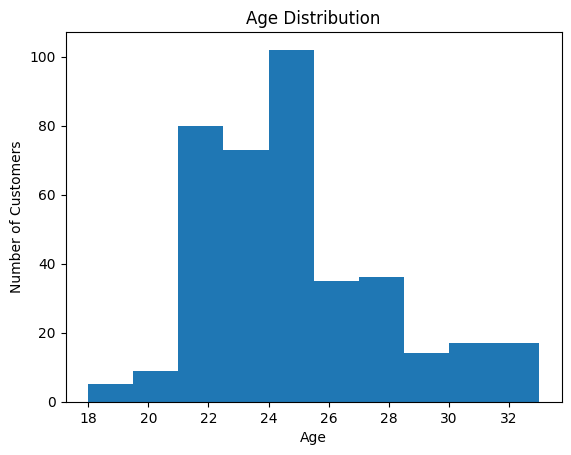

In [13]:
plt.hist(food['Age'])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

In [14]:
food['Gender'].value_counts()

,count
Gender,
Male,222
Female,166


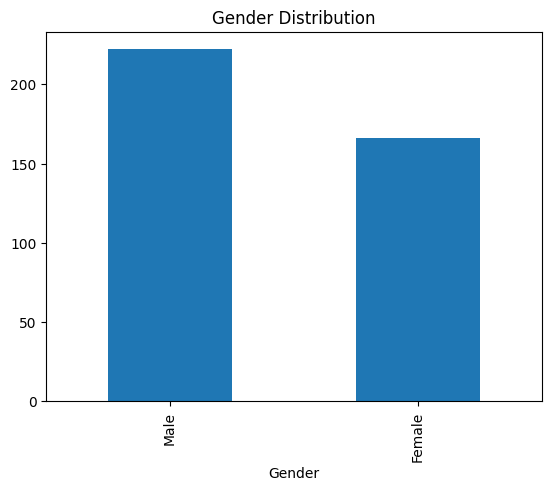

In [15]:
food['Gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.show()

In [16]:
food['Marital Status'].value_counts()

,count
Marital Status,
Single,268
Married,108
Prefer not to say,12


In [17]:
food['Marital Status'].describe()

,Marital Status
count,388
unique,3
top,Single
freq,268


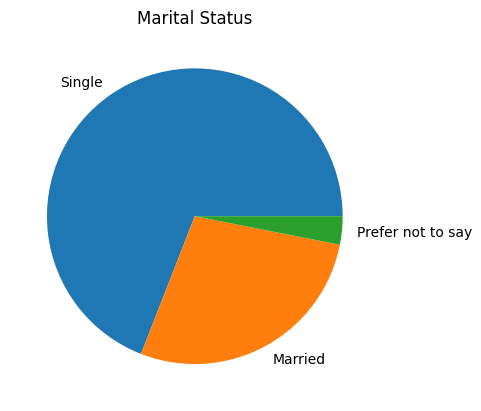

In [18]:
food['Marital Status'].value_counts().plot(kind='pie')
plt.title("Marital Status")
plt.ylabel("")
plt.show()

In [19]:
food['Occupation'].value_counts()

,count
Occupation,
Student,207
Employee,118
Self Employeed,54
House wife,9


In [20]:
food['Educational Qualifications'	].value_counts()

,count
Educational Qualifications,
Graduate,177
Post Graduate,174
Ph.D,23
School,12
Uneducated,2


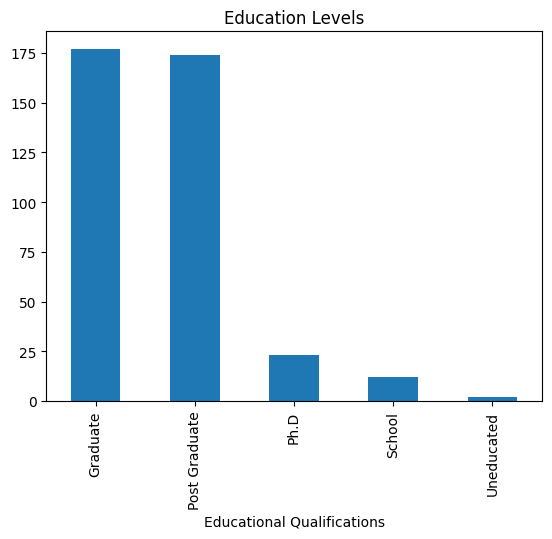

In [21]:
food['Educational Qualifications'].value_counts().plot(kind='bar')
plt.title("Education Levels")
plt.show()

In [22]:
food['Family size'].mean()

np.float64(3.2809278350515463)

In [29]:
food['Pin code'].value_counts().head(10)

,count
Pin code,
560009,36
560038,16
560010,14
560076,12
560034,11
560095,11
560036,9
560075,9
560024,8


In [24]:
feedback_rate = food['Feedback'].notnull().mean() * 100
feedback_rate

np.float64(100.0)

In [25]:
food.groupby('Gender')['Feedback'].count()

,Feedback
Gender,
Female,166
Male,222


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [35]:
ml = food[['Age', 'Monthly Income', 'Family size', 'Output']]
ml = ml.dropna()
encoded = pd.get_dummies(ml, columns=['Output','Monthly Income'])

In [36]:
encoded.head()

,Age,Family size,Output_No,Output_Yes,Monthly Income_10001 to 25000,Monthly Income_25001 to 50000,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income
0,20,4,False,True,False,False,False,False,True
1,24,3,False,True,False,False,True,False,False
2,22,3,False,True,False,False,True,False,False
3,22,6,False,True,False,False,False,False,True
4,22,4,False,True,False,False,True,False,False


In [41]:
X = encoded[['Age', 'Monthly Income_10001 to 25000',	'Monthly Income_25001 to 50000',	'Monthly Income_Below Rs.10000',	'Monthly Income_More than 50000',	'Family size']]
y = encoded['Output_Yes']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Accuracy: 0.8333333333333334
Precision: 0.8441558441558441
Recall: 0.9848484848484849
F1: 0.9090909090909091


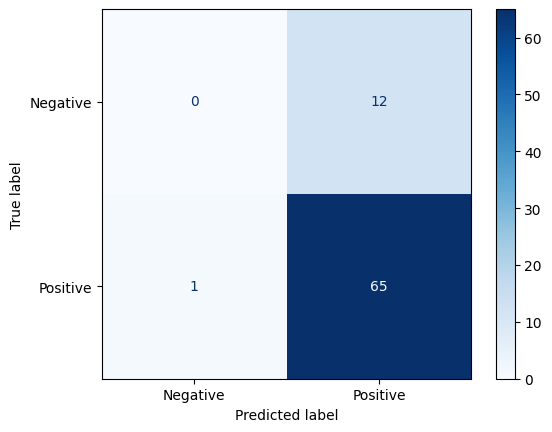

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative','Positive'])
disp.plot(cmap='Blues')
plt.show()

Model positive və negative nəticələri təxmin edir. Recall-un çox yüksək olması göstərir ki, model positive halları demək olar ki, tam tutur. Precision bir qədər aşağı olsa da, F1-score-un yüksək olması modelin balanslı və stabil olduğunu göstərir. Biznes məqsədindən asılı olaraq threshold tənzimlənə bilər.

In [50]:
food['Output'].value_counts()

,count
Output,
Yes,301
No,87


Model positive halları tapmağa fokuslanıb, yəni negative halların bir hissəsini müsbət kimi işarələyir. Bu da o deməkdir ki, False Positive hallar var. Səbəb olaraq datanın imbalanced olması ola bilər.